In [15]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")

import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:0'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8890.68it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8289.33it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [2]:
X = ref_train_data
Y = tar_train_data

In [3]:
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n = alignment_n.align_embeddings_batch(X,Y,train_steps=1000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 93985856.0 loss2 {tensor(0.7976, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8690, requires_grad=True)}
batch_idx 199,iteration 199, loss1 230.20437622070312 loss2 {tensor(0.5007, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 172.2294921875 loss2 {tensor(0.3736, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4540, requires_grad=True)}
batch_idx 97,iteration 597, loss1 156.99623107910156 loss2 {tensor(0.3807, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4370, requires_grad=True)}
batch_idx 296,iteration 796, loss1 149.78892517089844 loss2 {tensor(0.3575, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4240, requires_grad=True)}
batch_idx 495,iteration 995, loss1 124.27767944335938 loss2 {tensor(0.2883, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3820, requires_grad=True)}


In [6]:
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n_2 = alignment_n.align_embeddings_batch(Y,X,train_steps=5000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-18,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65502392.0 loss2 {tensor(0.7832, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8510, requires_grad=True)}
batch_idx 199,iteration 199, loss1 592.7222900390625 loss2 {tensor(0.5364, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 236.24374389648438 loss2 {tensor(0.3438, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4660, requires_grad=True)}
batch_idx 97,iteration 597, loss1 216.66461181640625 loss2 {tensor(0.3110, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4190, requires_grad=True)}
batch_idx 296,iteration 796, loss1 228.19483947753906 loss2 {tensor(0.3357, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4140, requires_grad=True)}
batch_idx 495,iteration 995, loss1 205.9328155517578 loss2 {tensor(0.2812, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3770, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 191.8606414794922 loss2 {tensor(0.2754, grad_fn=<AddBackward0>)} neibour_

Computing decision regions ...


TypeError: unsupported operand type(s) for *: 'float' and 'NormalDataProvider'

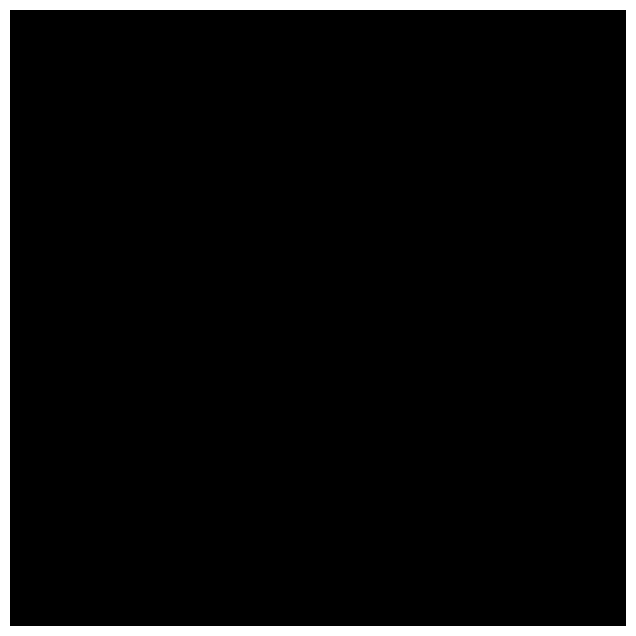

In [22]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from projects.deepdebugertool.DLVisDebugger.AlignVis.visualizerrr import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider,tar_provider,I, np.dot(tar_train_data, R_n_2.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the VAE architecture
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=-1)
        z = self.reparameterize(mu, log_var)
        x_recon = self.decoder(z)
        return x_recon, mu, log_var

# Hyperparameters
input_dim = 512
hidden_dim = 256
latent_dim = 2
batch_size = 128
learning_rate = 1e-5
num_epochs = 100
beta = 4.0 # Adjust this value based on your data and desired disentanglement

x_dataset = TensorDataset(torch.tensor(X))
y_dataset = TensorDataset(torch.tensor(Y))

batch_size = 128
x_dataloader = DataLoader(x_dataset, batch_size=batch_size, shuffle=True)
y_dataloader = DataLoader(y_dataset, batch_size=batch_size, shuffle=True)

# Initialize the VAE and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
import numpy as np


def centered_kernel(matrix):
    """Center the kernel matrix."""
    n = matrix.shape[0]
    one_n = np.ones((n, n)) / n
    return matrix - one_n.dot(matrix) - matrix.dot(one_n) + one_n.dot(matrix).dot(one_n)

def cka(X, Y):
    """Compute CKA between two sets of features."""
    X_kern = X.dot(X.T)
    Y_kern = Y.dot(Y.T)

    H_X = centered_kernel(X_kern)
    H_Y = centered_kernel(Y_kern)

    frob = np.linalg.norm(H_X.dot(H_Y), 'fro')
    frob_X = np.linalg.norm(H_X.dot(H_X), 'fro')
    frob_Y = np.linalg.norm(H_Y.dot(H_Y), 'fro')

    return frob ** 2 / (frob_X * frob_Y)

def centered_kernel_torch(matrix):
    """Center the kernel matrix in PyTorch."""
    n = matrix.shape[0]
    one_n = torch.ones((n, n), device=matrix.device) / n
    return matrix - one_n @ matrix - matrix @ one_n + one_n @ matrix @ one_n

def cka_torch(X, Y):
    """Compute CKA between two sets of features in PyTorch."""
    X_kern = X @ X.T
    Y_kern = Y @ Y.T

    H_X = centered_kernel_torch(X_kern)
    H_Y = centered_kernel_torch(Y_kern)

    frob = torch.linalg.norm(H_X @ H_Y, 'fro')
    frob_X = torch.linalg.norm(H_X @ H_X, 'fro')
    frob_Y = torch.linalg.norm(H_Y @ H_Y, 'fro')

    return frob ** 2 / (frob_X * frob_Y)

def compute_mmd_loss(x_latent, y_latent, kernel='rbf', bandwidth=1.0):
    xx, yy, zz = torch.mm(x_latent, x_latent.t()), torch.mm(y_latent, y_latent.t()), torch.mm(x_latent, y_latent.t())
    rx = (xx.diag().unsqueeze(0).expand_as(xx))
    ry = (yy.diag().unsqueeze(0).expand_as(yy))

    dxx = rx.t() + rx - 2. * xx
    dyy = ry.t() + ry - 2. * yy
    dxy = rx.t() + ry - 2. * zz

    if kernel == 'rbf':
        XX = torch.exp(-dxx / (2.0 * bandwidth**2))
        YY = torch.exp(-dyy / (2.0 * bandwidth**2))
        XY = torch.exp(-dxy / (2.0 * bandwidth**2))
    else:
        raise NotImplementedError
    
    return XX.mean() + YY.mean() - 2. * XY.mean()

def pairwise_distances(X):
    X_norm = torch.sum(X ** 2, 1).view(-1, 1)
    return X_norm + X_norm.view(1, -1) - 2 * X @ X.t()


def contrastive_loss(Z_X, Z_Y, margin=1.0):
    D_X = pairwise_distances(Z_X)
    D_Y = pairwise_distances(Z_Y)
    loss = torch.mean((D_X - D_Y) ** 2)
    return loss

def loss_function(x, x_recon, mu, log_var, beta, y, y_trans, alpha, gamma, Z_X, Z_Y, delta):
    recon_loss = nn.functional.mse_loss(x_recon, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    cka_similarity = cka_torch(y, y_trans)
    f_norm_distance = torch.linalg.norm(x - y_trans, 'fro')
    con_loss = contrastive_loss(Z_X, Z_Y)
    return recon_loss + beta * kl_div - alpha * cka_similarity + gamma * f_norm_distance + delta * con_loss, kl_div, cka_similarity, f_norm_distance, con_loss




In [21]:
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

alpha = 5.0  # Adjust the weight of the CKA term in the loss function
cka_batch_size = 500  # Adjust the number of samples used for CKA calculation
gamma = 1.0
# Train the β-VAE with CKA regularization
model.train()
delta = 0.1  # Adjust the weight of the contrastive loss term in the loss function

for epoch in range(num_epochs):
    for (x_data, y_data) in zip(x_dataloader, y_dataloader):
        x = x_data[0].to(device)
        y = y_data[0].to(device)

        x_recon, mu, log_var = model(x)

        # Compute Y_trans and CKA similarity
        mu_y, log_var_y = model.encoder(y).chunk(2, dim=-1)
        z_y = model.reparameterize(mu_y, log_var_y)
        y_trans = model.decoder(z_y)

        # Compute Z_X and Z_Y
        mu_x = mu.clone().detach()
        z_x = model.reparameterize(mu_x, log_var)
        Z_X = z_x.clone().detach()
        Z_Y = z_y.clone().detach()

        loss, kl_div, cka_similarity, f_norm_distance, con_loss = loss_function(x, x_recon, mu, log_var, beta, y, y_trans, alpha, gamma, Z_X, Z_Y, delta)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, kl_div: {kl_div}, cka:{cka_similarity},f_norm_distance:{f_norm_distance}, con_loss:{con_loss}')


Epoch [1/100], Loss: 25187.7832, kl_div: 51.05543518066406, cka:0.05826845020055771,f_norm_distance:158.17140197753906, con_loss:178.03868103027344
Epoch [2/100], Loss: 24234.1094, kl_div: 209.04476928710938, cka:0.05254602059721947,f_norm_distance:154.74496459960938, con_loss:69.45138549804688
Epoch [3/100], Loss: 25428.2559, kl_div: 194.76564025878906, cka:0.0946621522307396,f_norm_distance:160.9445037841797, con_loss:88.21405792236328
Epoch [4/100], Loss: 22388.3457, kl_div: 185.51922607421875, cka:0.06028447300195694,f_norm_distance:152.9392547607422, con_loss:145.19679260253906
Epoch [5/100], Loss: 22628.8770, kl_div: 231.57684326171875, cka:0.0322825089097023,f_norm_distance:155.8185272216797, con_loss:197.6560821533203
Epoch [6/100], Loss: 20759.9766, kl_div: 235.81161499023438, cka:0.06329786777496338,f_norm_distance:151.3763427734375, con_loss:188.05772399902344
Epoch [7/100], Loss: 21316.9414, kl_div: 266.7874755859375, cka:0.15601404011249542,f_norm_distance:155.558578491210

In [ ]:
def get_decision_view_grid(visualizer, epoch):

        x_min, y_min, x_max, y_max = visualizer.get_epoch_plot_measures(epoch)
        # create grid
        xs = np.linspace(x_min, x_max, 200)
        ys = np.linspace(y_min, y_max, 200)
        grid = np.array(np.meshgrid(xs, ys))
        grid = np.swapaxes(grid.reshape(grid.shape[0], -1), 0, 1)
        
        return grid

grid = get_decision_view_grid(vis,200)


In [6]:
y = torch.tensor(Y).to(device)
mu_y, log_var_y = model.encoder(y).chunk(2, dim=-1)
z_y = model.reparameterize(mu_y, log_var_y)


In [7]:
y_trans = model.decoder(z_y)
y_trans_np = y_trans.detach().cpu().numpy()

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8120.19it/s]


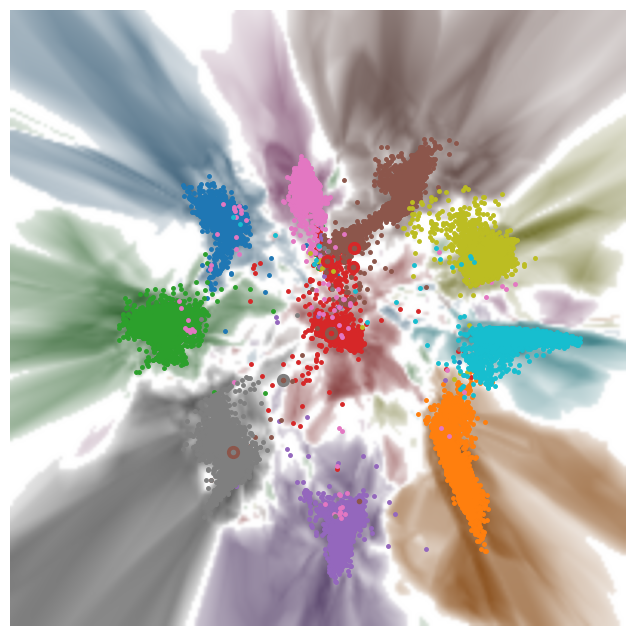

In [11]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVis.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider,tar_provider,R_n.detach().numpy(), np.dot(tar_train_data, R_n_2.detach().numpy()), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 7530.87it/s]


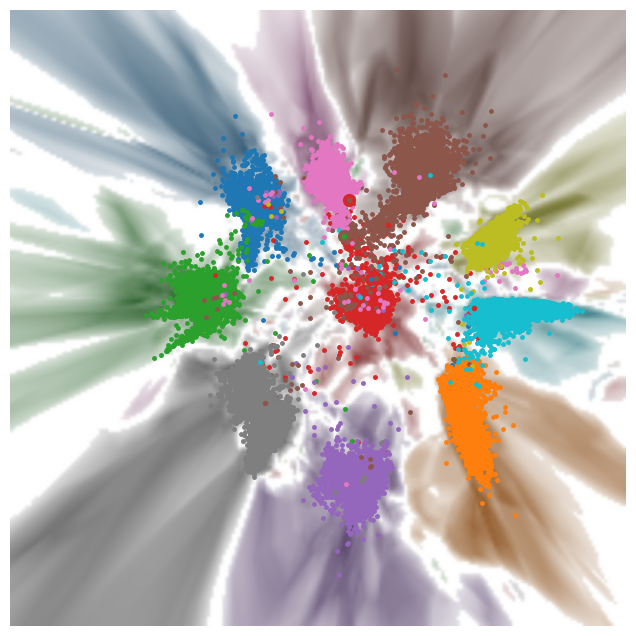

In [14]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVis.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider,ref_provider, I, ref_train_data, projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))